In [7]:
import pandas as pd
meteorite_data = pd.read_csv("https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD")
meteorite_data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [13]:
meteorite_data_sorted = meteorite_data.sort_values("mass (g)", ascending = True)

meteorite_data_sorted

In [16]:
meteorite_data_sorted.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
31063,Österplana 050,56149,Relict,Relict OC,0.0,Found,2003.0,58.58333,13.43333,"(58.58333, 13.43333)"
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,2012.0,58.58333,13.43333,"(58.58333, 13.43333)"
31075,Österplana 062,56161,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.58333, 13.43333)"
12640,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.26333, 136.83833)"
31064,Österplana 051,56150,Relict,Relict OC,0.0,Found,2006.0,58.58333,13.43333,"(58.58333, 13.43333)"


In [24]:
meteorite_data.groupby("year").count().head()

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation
year,,,,,,,,,
860.0,1,1,1,1,1,1,1,1,1
920.0,1,1,1,1,0,1,1,1,1
1399.0,1,1,1,1,1,1,1,1,1
1490.0,1,1,1,1,1,1,1,1,1
1491.0,1,1,1,1,1,1,1,1,1


In [26]:
meteorite_data["year"].sort_values()

704       860.0
679       920.0
278      1399.0
856      1490.0
283      1491.0
          ...  
38207       NaN
38231       NaN
38308       NaN
38335       NaN
45700       NaN
Name: year, Length: 45716, dtype: float64

In [29]:
#Identifies cells with missing values
meteorite_data.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [31]:
#Get total number of rows that contain missing values
meteorite_data.isna().sum().sum()

22367

In [33]:
#Percentage of rows with missing values
(meteorite_data.isna().sum().sum() / meteorite_data.shape[0]) * 100

48.92597777583341

In [35]:
#This data has nearly 50% of all the data missing. This isn't the best data to use to draw full future predictions but can be used to draw conclusions on the data we do have

In [37]:
#Drop rows containing missing values
meteorite_data = meteorite_data.dropna()

In [39]:
meteorite_data.shape

(38115, 10)

In [41]:
#investigate for duplicates
meteorite_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45711    False
45712    False
45713    False
45714    False
45715    False
Length: 38115, dtype: bool

In [43]:
#investigate for duplicates
meteorite_data.duplicated().sum()

0

In [45]:
#PRovides data type for year column
meteorite_data["year"].dtype

dtype('float64')

In [47]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

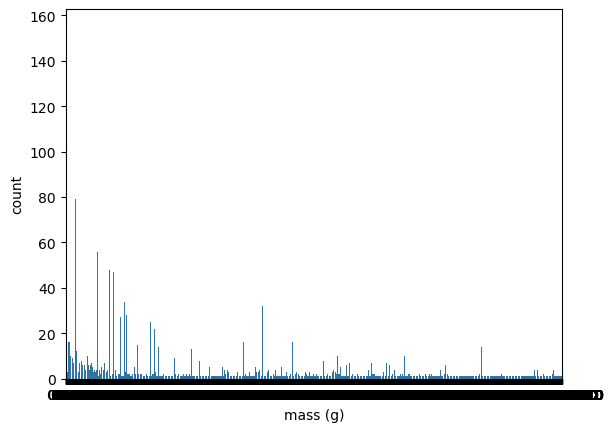

In [52]:
#Setting up a plot of the mass distribution
sn.countplot(x='mass (g)', data = meteorite_data)
plt.show()

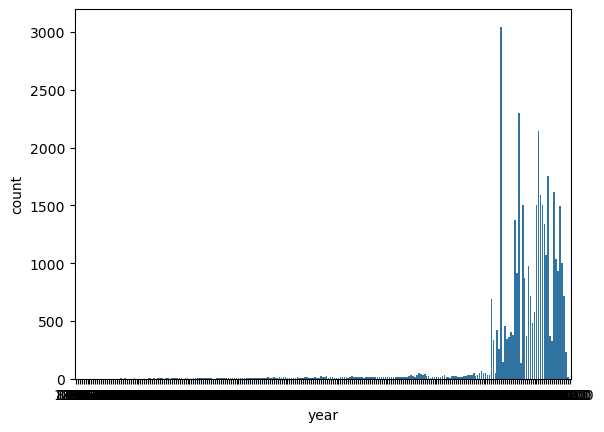

In [53]:
#Setting up a plot of the year found distribution
sn.countplot(x='year', data = meteorite_data)
plt.show()

#Visualization of the average mass per year
sn.barplot(x = 'year', y = 'mass (g)', data = meteorite_data)
plt.show()

In [58]:
import numpy as np

In [62]:
meteorite_data

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


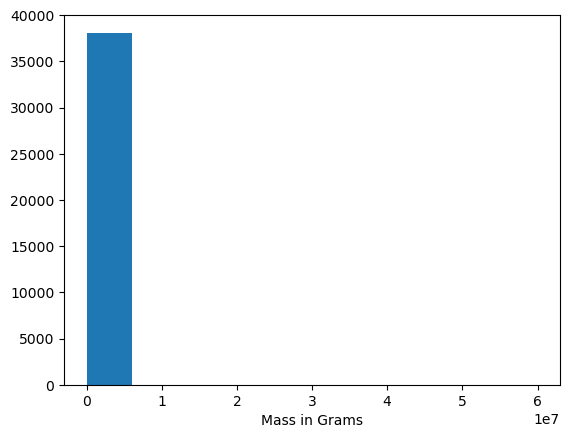

In [64]:
#histogram
plt.hist(meteorite_data['mass (g)'])
plt.xlabel('Mass in Grams')
plt.show()

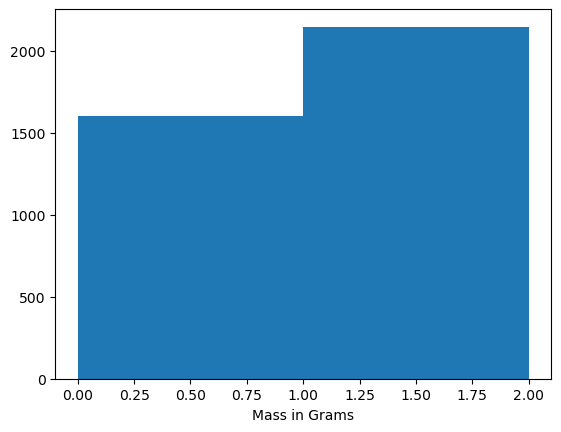

In [68]:
#histogram, with smaller bins to see the data arrangement 
plt.hist(meteorite_data['mass (g)'],bins=np.arange(0,3,1))
plt.xlabel('Mass in Grams')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

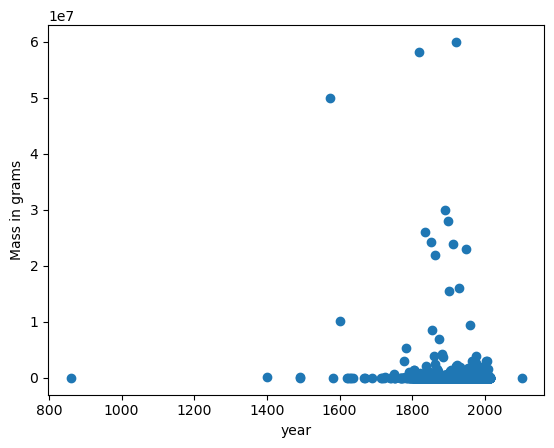

In [70]:
#Scatterplot to compare years and mass
plt.scatter(x=meteorite_data['year'],y=meteorite_data['mass (g)'])
plt.xlabel('year')
plt.ylabel('Mass in grams')
plt.show

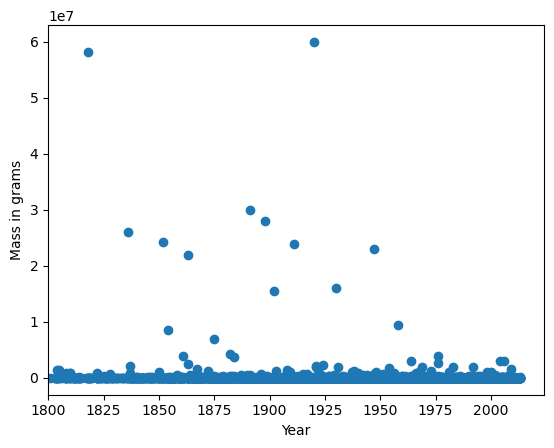

In [72]:
#I want to review the meteorite data since 1800
plt.scatter(x=meteorite_data["year"],y=meteorite_data["mass (g)"])
plt.xlabel('Year')
plt.ylabel("Mass in grams")
plt.xlim(1800,2024)
plt.show()

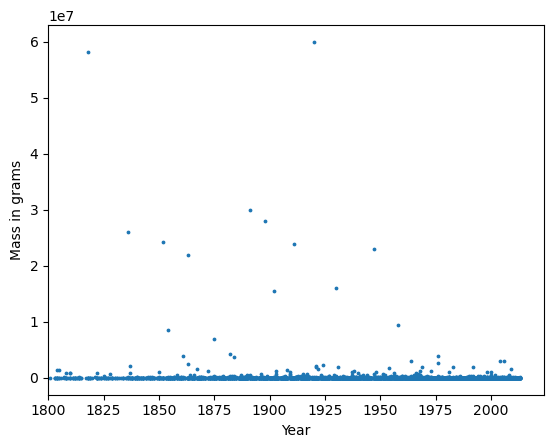

In [74]:
#I want to review the meteorite data since 1800, with smaller size of datapoints
plt.scatter(x=meteorite_data["year"],y=meteorite_data["mass (g)"], s=3)
plt.xlabel('Year')
plt.ylabel("Mass in grams")
plt.xlim(1800,2024)
plt.show()